# بسم الله الرحمن الرحيم

In [147]:
from utils import *
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot as plt 


In [148]:
df = pd.read_csv("dataset/body_level_classification_train.csv")
df_original= cleaning_data(df).copy()
all_class_train,all_class_test=data_spliting(df_original,1/3)
## shuffling 
all_class_train = all_class_train.sample(frac=1.0, random_state=42)
all_class_test = all_class_test.sample(frac=1.0, random_state=42)
X_train=all_class_train.drop(["Body_Level"],axis=1).to_numpy()
Y_train=all_class_train["Body_Level"].to_numpy()
X_test =all_class_test.drop(["Body_Level"],axis=1).to_numpy()
Y_test =all_class_test["Body_Level"].to_numpy()


X_train, scaler= data_scaling(X_train)
X_val, X_test, Y_val, Y_test = train_test_split(X_test
                                                     , Y_test, test_size=0.5, random_state=42)
X_val = scaler.transform(X_val)
X_test=scaler.transform(X_test)

In [149]:
class_weights = all_class_train["Body_Level"].value_counts().to_dict()
total_num = sum(class_weights.values())
class_weights= { i : (total_num/(4* j )) for i ,j in zip(class_weights.keys(),class_weights.values())}
class_weights

{3: 0.5429515418502202,
 2: 0.9095940959409594,
 1: 1.8395522388059702,
 0: 1.9409448818897639}

# Applying bare Random Forest 

In [150]:
bare_RF = RandomForestClassifier(random_state=42)
bare_RF.fit(np.concatenate([X_train,X_val], axis=0)
                   ,np.concatenate([Y_train,Y_val],axis=0))

RandomForestClassifier(random_state=42)

In [151]:
bare_RF_accuracy , repo = test_model(bare_RF,X_train,Y_train,axis=False)

In [152]:
print(bare_RF_accuracy)
print(repo)

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       127
           1       1.00      1.00      1.00       134
           2       1.00      1.00      1.00       271
           3       1.00      1.00      1.00       454

    accuracy                           1.00       986
   macro avg       1.00      1.00      1.00       986
weighted avg       1.00      1.00      1.00       986



In [153]:
bare_RF_accuracy_test , repo = test_model(bare_RF,X_test,Y_test,axis=False)
print(bare_RF_accuracy_test)
print(repo)

0.9308943089430894
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        28
           1       0.88      0.83      0.86        36
           2       0.89      0.94      0.91        80
           3       0.96      0.96      0.96       102

    accuracy                           0.93       246
   macro avg       0.93      0.92      0.92       246
weighted avg       0.93      0.93      0.93       246



## Applying Random Forest With Class Weights

In [154]:
weights_RF_model = RandomForestClassifier(random_state=42,class_weight=class_weights)
weights_RF_model.fit(np.concatenate([X_train,X_val], axis=0)
                   ,np.concatenate([Y_train,Y_val],axis=0))

RandomForestClassifier(class_weight={0: 1.9409448818897639,
                                     1: 1.8395522388059702,
                                     2: 0.9095940959409594,
                                     3: 0.5429515418502202},
                       random_state=42)

In [155]:
weights_RF , repo = test_model(weights_RF_model,X_train,Y_train,axis=False)

In [156]:
print(weights_RF)
print(repo)

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       127
           1       1.00      1.00      1.00       134
           2       1.00      1.00      1.00       271
           3       1.00      1.00      1.00       454

    accuracy                           1.00       986
   macro avg       1.00      1.00      1.00       986
weighted avg       1.00      1.00      1.00       986



In [157]:
weights_RF_test , repo = test_model(weights_RF_model,X_test,Y_test,axis=False)
print(weights_RF_test)
print(repo)

0.926829268292683
              precision    recall  f1-score   support

           0       0.96      0.89      0.93        28
           1       0.86      0.83      0.85        36
           2       0.90      0.94      0.92        80
           3       0.96      0.96      0.96       102

    accuracy                           0.93       246
   macro avg       0.92      0.91      0.91       246
weighted avg       0.93      0.93      0.93       246



## HyperParameter Tuning on Random Forest 

In [158]:

# Define the random forest model
best_RF_model = RandomForestClassifier(random_state=42)

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [50, 100, 200,300,400,500,600],
    'max_depth': [10, 20, 30, None],
}

# Define the grid search object
grid_search = GridSearchCV(estimator=best_RF_model, param_grid=param_grid, cv=5,verbose=2)

# Fit the grid search object to the data
grid_search.fit(np.concatenate([X_train,X_val], axis=0)
                   ,np.concatenate([Y_train,Y_val],axis=0))

# Print the best parameters and best score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
[CV] END ......................max_depth=10, n_estimators=50; total time=   0.1s
[CV] END ......................max_depth=10, n_estimators=50; total time=   0.1s
[CV] END ......................max_depth=10, n_estimators=50; total time=   0.1s
[CV] END ......................max_depth=10, n_estimators=50; total time=   0.1s
[CV] END ......................max_depth=10, n_estimators=50; total time=   0.1s
[CV] END .....................max_depth=10, n_estimators=100; total time=   0.3s
[CV] END .....................max_depth=10, n_estimators=100; total time=   0.2s
[CV] END .....................max_depth=10, n_estimators=100; total time=   0.3s
[CV] END .....................max_depth=10, n_estimators=100; total time=   0.2s
[CV] END .....................max_depth=10, n_estimators=100; total time=   0.2s
[CV] END .....................max_depth=10, n_estimators=200; total time=   0.4s
[CV] END .....................max_depth=10, n_e

[CV] END .....................max_depth=30, n_estimators=600; total time=   1.4s
[CV] END .....................max_depth=30, n_estimators=600; total time=   1.3s
[CV] END .....................max_depth=30, n_estimators=600; total time=   1.3s
[CV] END .....................max_depth=30, n_estimators=600; total time=   1.3s
[CV] END ....................max_depth=None, n_estimators=50; total time=   0.1s
[CV] END ....................max_depth=None, n_estimators=50; total time=   0.1s
[CV] END ....................max_depth=None, n_estimators=50; total time=   0.1s
[CV] END ....................max_depth=None, n_estimators=50; total time=   0.1s
[CV] END ....................max_depth=None, n_estimators=50; total time=   0.1s
[CV] END ...................max_depth=None, n_estimators=100; total time=   0.2s
[CV] END ...................max_depth=None, n_estimators=100; total time=   0.2s
[CV] END ...................max_depth=None, n_estimators=100; total time=   0.3s
[CV] END ...................

In [159]:
cv_results = grid_search.cv_results_

In [160]:
best_RF_model_accuracy , repo = test_model(grid_search.best_estimator_,X_test,Y_test,axis=False)

In [161]:
print(best_RF_model_accuracy )
print(repo)

0.9308943089430894
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        28
           1       0.86      0.86      0.86        36
           2       0.90      0.93      0.91        80
           3       0.96      0.96      0.96       102

    accuracy                           0.93       246
   macro avg       0.93      0.92      0.92       246
weighted avg       0.93      0.93      0.93       246



In [162]:
cv_results = grid_search.cv_results_
cv_results

{'mean_fit_time': array([0.09650674, 0.21562166, 0.39444904, 0.58546119, 1.02023306,
        1.11603432, 1.48647699, 0.1548882 , 0.27653098, 0.58450894,
        0.80679479, 1.1791182 , 1.14662828, 1.1433413 , 0.10606866,
        0.19887366, 0.41947422, 0.63028426, 0.83147035, 1.12926598,
        1.26710887, 0.11043153, 0.20437198, 0.40504966, 0.62685761,
        0.88684611, 1.03342948, 1.21532655]),
 'std_fit_time': array([0.010446  , 0.0201871 , 0.02368314, 0.06851658, 0.20289397,
        0.14703374, 0.08793916, 0.03072102, 0.05207899, 0.02516233,
        0.09266163, 0.11408904, 0.13580347, 0.0292674 , 0.00569471,
        0.0228225 , 0.02679266, 0.02226686, 0.0160014 , 0.11581054,
        0.03801445, 0.00809513, 0.02117874, 0.01028289, 0.02633414,
        0.08018844, 0.08431763, 0.04646372]),
 'mean_score_time': array([0.00747404, 0.01695771, 0.02476807, 0.0379066 , 0.06129885,
        0.07132502, 0.0877687 , 0.00923576, 0.01614351, 0.03375916,
        0.04415803, 0.06224413, 0.061337

0.929301207991837 {'max_depth': 10, 'n_estimators': 50}
0.9317468154438628 {'max_depth': 10, 'n_estimators': 100}
0.9349922649024061 {'max_depth': 10, 'n_estimators': 200}
0.9341792567723248 {'max_depth': 10, 'n_estimators': 300}
0.9390540140219216 {'max_depth': 10, 'n_estimators': 400}
0.9398670221520028 {'max_depth': 10, 'n_estimators': 500}
0.9382442974227312 {'max_depth': 10, 'n_estimators': 600}


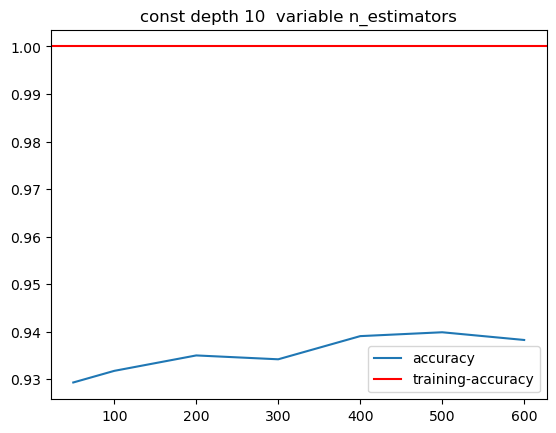

In [165]:
cv_results = grid_search.cv_results_
estimators_max_depth_10 = []
accuracies_max_depth_10 = []

cv_results = grid_search.cv_results_


for mean_score, params in zip(cv_results['mean_test_score'], cv_results['params']):
    if(params["max_depth"]==10):
        estimators_max_depth_10.append(params["n_estimators"])
        accuracies_max_depth_10.append(mean_score)
        print(mean_score,params)
        
estimators_max_depth_10
accuracies_max_depth_10

plt.plot(estimators_max_depth_10,accuracies_max_depth_10,label='accuracy')
plt.title("const depth 10  variable n_estimators")
plt.axhline(1, color='red',label='training-accuracy') 
plt.legend()
plt.show()


0.9366281557552419 {'max_depth': 20, 'n_estimators': 50}
0.9415029130048385 {'max_depth': 20, 'n_estimators': 100}
0.9471873868536257 {'max_depth': 20, 'n_estimators': 200}
0.9382508804845134 {'max_depth': 20, 'n_estimators': 300}
0.9439353543333004 {'max_depth': 20, 'n_estimators': 400}
0.9431223462032191 {'max_depth': 20, 'n_estimators': 500}
0.94312563773411 {'max_depth': 20, 'n_estimators': 600}


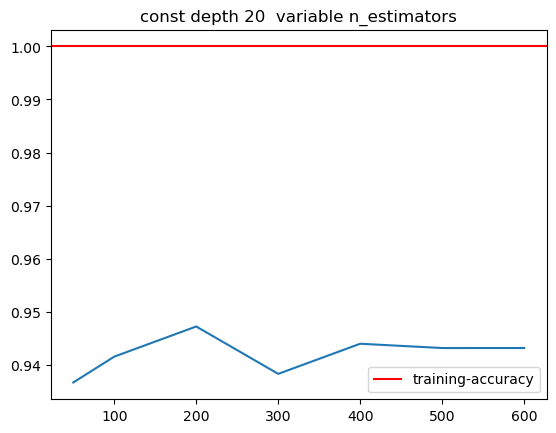

In [166]:
estimators_max_depth_20 = []
accuracies_max_depth_20 = []

for mean_score, params in zip(cv_results['mean_test_score'], cv_results['params']):
    if(params["max_depth"]==20):
        estimators_max_depth_20.append(params["n_estimators"])
        accuracies_max_depth_20.append(mean_score)
        print(mean_score,params)

        

plt.plot(estimators_max_depth_20,accuracies_max_depth_20)
plt.title("const depth 20  variable n_estimators")
plt.axhline(1, color='red',label='training-accuracy') 
plt.legend()
plt.show()

plt.show()

0.9366281557552419 {'max_depth': 30, 'n_estimators': 50}
0.9406899048747572 {'max_depth': 30, 'n_estimators': 100}
0.9471873868536257 {'max_depth': 30, 'n_estimators': 200}
0.9382508804845134 {'max_depth': 30, 'n_estimators': 300}
0.9439353543333004 {'max_depth': 30, 'n_estimators': 400}
0.9431223462032191 {'max_depth': 30, 'n_estimators': 500}
0.94312563773411 {'max_depth': 30, 'n_estimators': 600}


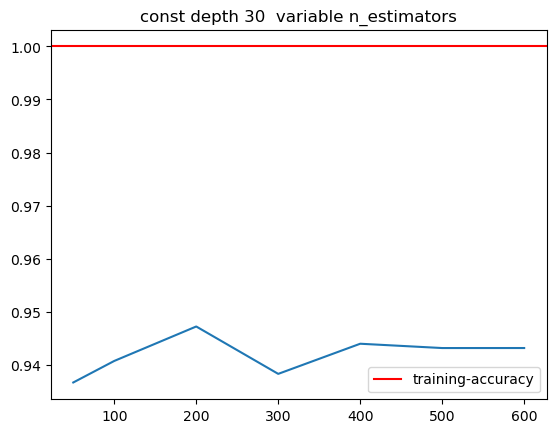

In [167]:
estimators_max_depth_30 = []
accuracies_max_depth_30 = []

for mean_score, params in zip(cv_results['mean_test_score'], cv_results['params']):
    if(params["max_depth"]==30):
        estimators_max_depth_30.append(params["n_estimators"])
        accuracies_max_depth_30.append(mean_score)
        print(mean_score,params)



plt.plot(estimators_max_depth_30,accuracies_max_depth_30)

plt.title("const depth 30  variable n_estimators")
plt.axhline(1, color='red',label='training-accuracy') 
plt.legend()
plt.show()

plt.show()



0.9366281557552419 {'max_depth': None, 'n_estimators': 50}
0.9406899048747572 {'max_depth': None, 'n_estimators': 100}
0.9471873868536257 {'max_depth': None, 'n_estimators': 200}
0.9382508804845134 {'max_depth': None, 'n_estimators': 300}
0.9439353543333004 {'max_depth': None, 'n_estimators': 400}
0.9431223462032191 {'max_depth': None, 'n_estimators': 500}
0.94312563773411 {'max_depth': None, 'n_estimators': 600}


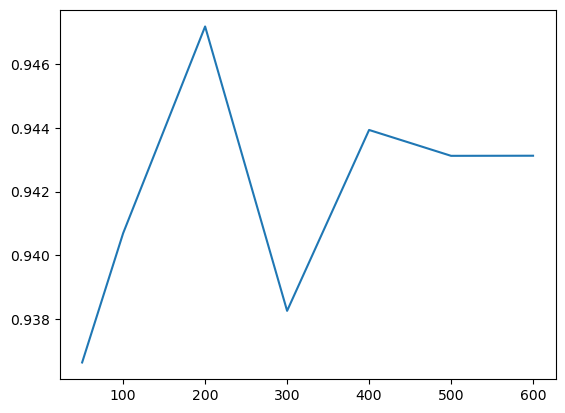

In [119]:
estimators_max_depth_None = []
accuracies_max_depth_None = []

for mean_score, params in zip(cv_results['mean_test_score'], cv_results['params']):
    if(params["max_depth"]==None):
        estimators_max_depth_None.append(params["n_estimators"])
        accuracies_max_depth_None.append(mean_score)
        print(mean_score,params)



plt.plot(estimators_max_depth_None,accuracies_max_depth_None)
plt.show()



In [120]:
print(cv_results["params"][np.argmax(cv_results["mean_test_score"])]["max_depth"])
print(cv_results["params"][np.argmax(cv_results["mean_test_score"])]["n_estimators"])

20
200


In [121]:
best_model_RF= RandomForestClassifier(n_estimators=400,max_depth=20,class_weight=class_weights)
# concat class weights with it 
best_model_RF.fit(np.concatenate([X_train,X_val], axis=0)
                   ,np.concatenate([Y_train,Y_val],axis=0))


RandomForestClassifier(class_weight={0: 1.9409448818897639,
                                     1: 1.8395522388059702,
                                     2: 0.9095940959409594,
                                     3: 0.5429515418502202},
                       max_depth=20, n_estimators=400)

In [122]:
best_RF_model_accuracy , repo = test_model(best_model_RF,X_test,Y_test,axis=False)

In [123]:
print(best_RF_model_accuracy)
print(repo)

0.9349593495934959
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        28
           1       0.86      0.86      0.86        36
           2       0.91      0.93      0.92        80
           3       0.96      0.97      0.97       102

    accuracy                           0.93       246
   macro avg       0.93      0.92      0.93       246
weighted avg       0.94      0.93      0.94       246



# oversampling 

In [124]:
oversampled= over_sampling(all_class_train,sampling_ratio=0.5)
class_weights = oversampled["Body_Level"].value_counts().to_dict()
total_num = sum(class_weights.values())
class_weights= { i : (total_num/(4* j )) for i ,j in zip(class_weights.keys(),class_weights.values())}
class_weights

X_train=oversampled.drop(["Body_Level"],axis=1).to_numpy()
Y_train=oversampled["Body_Level"].to_numpy()
X_test =all_class_test.drop(["Body_Level"],axis=1).to_numpy()
Y_test =all_class_test["Body_Level"].to_numpy()
X_train, scaler= data_scaling(X_train)
X_val, X_test, Y_val, Y_test = train_test_split(X_test
                                                     , Y_test, test_size=0.5, random_state=42)
X_val = scaler.transform(X_val)
X_test=scaler.transform(X_test)

# Applying bare Random Forest after oversampling

In [125]:
bare_RF_oversampled = RandomForestClassifier(random_state=42)
bare_RF_oversampled.fit(np.concatenate([X_train,X_val], axis=0)
                   ,np.concatenate([Y_train,Y_val],axis=0))

RandomForestClassifier(random_state=42)

In [126]:
bare_RF_oversampled_accuracy , repo = test_model(bare_RF,X_train,Y_train,axis=False)


In [127]:
print(bare_RF_oversampled_accuracy)
print(repo)

0.929384965831435
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       257
           1       1.00      0.81      0.89       262
           2       0.86      0.88      0.87       344
           3       0.92      1.00      0.96       454

    accuracy                           0.93      1317
   macro avg       0.94      0.92      0.93      1317
weighted avg       0.93      0.93      0.93      1317



In [128]:
weights_RF_oversampled = RandomForestClassifier(random_state=42, class_weight=class_weights)
weights_RF_oversampled.fit(np.concatenate([X_train,X_val], axis=0)
                   ,np.concatenate([Y_train,Y_val],axis=0))

RandomForestClassifier(class_weight={0: 1.2811284046692606,
                                     1: 1.256679389312977,
                                     2: 0.9571220930232558,
                                     3: 0.7252202643171806},
                       random_state=42)

In [129]:
weights_RF_oversampled_accuracy , repo = test_model(weights_RF_oversampled,
                                                    X_train,Y_train,axis=False)


In [130]:
print(weights_RF_oversampled_accuracy)
print(repo)

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       257
           1       1.00      1.00      1.00       262
           2       1.00      1.00      1.00       344
           3       1.00      1.00      1.00       454

    accuracy                           1.00      1317
   macro avg       1.00      1.00      1.00      1317
weighted avg       1.00      1.00      1.00      1317



In [131]:

# Define the random forest model
best_RF_oversampled_model = RandomForestClassifier(random_state=42,class_weight=class_weights)

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [50, 100, 200,300,400,500,600],
    'max_depth': [10, 20, 30, None],
}

# Define the grid search object
grid_search = GridSearchCV(estimator=best_RF_oversampled_model, param_grid=param_grid, cv=5,verbose=2)

# Fit the grid search object to the data
grid_search.fit(np.concatenate([X_train,X_val], axis=0)
                   ,np.concatenate([Y_train,Y_val],axis=0))

# Print the best parameters and best score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
[CV] END ......................max_depth=10, n_estimators=50; total time=   0.2s
[CV] END ......................max_depth=10, n_estimators=50; total time=   0.1s
[CV] END ......................max_depth=10, n_estimators=50; total time=   0.1s
[CV] END ......................max_depth=10, n_estimators=50; total time=   0.1s
[CV] END ......................max_depth=10, n_estimators=50; total time=   0.2s
[CV] END .....................max_depth=10, n_estimators=100; total time=   0.2s
[CV] END .....................max_depth=10, n_estimators=100; total time=   0.2s
[CV] END .....................max_depth=10, n_estimators=100; total time=   0.2s
[CV] END .....................max_depth=10, n_estimators=100; total time=   0.3s
[CV] END .....................max_depth=10, n_estimators=100; total time=   0.2s
[CV] END .....................max_depth=10, n_estimators=200; total time=   0.5s
[CV] END .....................max_depth=10, n_e

[CV] END .....................max_depth=30, n_estimators=600; total time=   1.5s
[CV] END .....................max_depth=30, n_estimators=600; total time=   1.4s
[CV] END .....................max_depth=30, n_estimators=600; total time=   1.4s
[CV] END .....................max_depth=30, n_estimators=600; total time=   1.4s
[CV] END ....................max_depth=None, n_estimators=50; total time=   0.1s
[CV] END ....................max_depth=None, n_estimators=50; total time=   0.1s
[CV] END ....................max_depth=None, n_estimators=50; total time=   0.1s
[CV] END ....................max_depth=None, n_estimators=50; total time=   0.2s
[CV] END ....................max_depth=None, n_estimators=50; total time=   0.1s
[CV] END ...................max_depth=None, n_estimators=100; total time=   0.3s
[CV] END ...................max_depth=None, n_estimators=100; total time=   0.3s
[CV] END ...................max_depth=None, n_estimators=100; total time=   0.3s
[CV] END ...................

In [132]:
best_RF_oversampled_model_accuracy , repo = test_model(grid_search.best_estimator_
                                                       ,X_test,Y_test,axis=False)

In [133]:
print(best_RF_oversampled_model_accuracy )
print(repo)

0.9308943089430894
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        28
           1       0.86      0.86      0.86        36
           2       0.90      0.93      0.91        80
           3       0.96      0.96      0.96       102

    accuracy                           0.93       246
   macro avg       0.93      0.92      0.92       246
weighted avg       0.93      0.93      0.93       246

